<a href="https://colab.research.google.com/github/Roshni-Bala/Product-Recommendation-System/blob/main/Product_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import torch
import numpy as np

In [28]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Appliances.json.gz

--2023-12-02 22:55:26--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Appliances.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59884788 (57M) [application/x-gzip]
Saving to: ‘meta_Appliances.json.gz.1’

meta_Appliances.jso 100%[===================>]  57.11M  15.9MB/s    in 4.3s    

2023-12-02 22:55:31 (13.4 MB/s) - ‘meta_Appliances.json.gz.1’ saved [59884788/59884788]



In [29]:
def open_to_df(file):
  data = []
  with gzip.open(file) as f:
      for l in f:
          data.append(json.loads(l.strip()))

  df = pd.DataFrame.from_dict(data)
  return df

In [31]:
metadata = open_to_df('meta_Appliances.json.gz')
metadata.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[],,Tupperware Freezer Square Round Container Set ...,[],,Tupperware,[Each 3-pc. set includes two 7/8-cup/200 mL an...,"[>#39,745 in Appliances (See top 100)]",[],{},Appliances,,"November 19, 2008",,7301113188,[],[]
1,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[2 X Tupperware Pure & Fresh Unique Covered Co...,,2 X Tupperware Pure &amp; Fresh Unique Covered...,[],,Tupperware,[2 X Tupperware Pure & Fresh Unique Covered Co...,"[>#6,118 in Appliances (See top 100)]",[B004RUGHJW],{},Appliances,,"June 5, 2016",$3.62,7861850250,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,"[Appliances, Parts &amp; Accessories]",,[],,The Cigar - Moments of Pleasure,[],,The Cigar Book,[],"[>#1,861,816 in Home &amp; Kitchen (See Top 10...","[B01HCAVSLK, 1632206579]",{},Amazon Home,,,$150.26,8792559360,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,"[Appliances, Parts & Accessories]","class=""a-keyvalue prodDetTable"" role=""present...","[Multi purpost descaler, especially suited to ...",,Caraselle 2X 50G Appliance Descalene,[],,Caraselle,[],"[>#1,654,505 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"December 17, 2014",.a-box-inner{background-color:#fff}#alohaBuyBo...,9792954481,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Full gauge and size beveled-edge; furnished w...,,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,[],,EATON Wiring,[Returns will not be honored on this closeout ...,"[>#3,066,990 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"January 16, 2007",$3.43,B00002N5EL,[],[]


In [18]:
metadata.to_csv('metadata.csv',escapechar='\\')

In [20]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Appliances.json.gz

--2023-12-02 22:51:39--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Appliances.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69677301 (66M) [application/x-gzip]
Saving to: ‘Appliances.json.gz’

Appliances.json.gz  100%[===================>]  66.45M  18.2MB/s    in 4.4s    

2023-12-02 22:51:44 (15.3 MB/s) - ‘Appliances.json.gz’ saved [69677301/69677301]



In [32]:
userrating = open_to_df('Appliances.json.gz')
userrating.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN
1,5.0,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN
2,5.0,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200,NaN
3,5.0,NaN,False,"10 9, 2013",A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,1381276800,NaN
4,5.0,10,False,"09 7, 2013",A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,NaN


In [33]:
userrating.to_csv('userrating.csv')

In [34]:
userrating.describe()

,overall,unixReviewTime
count,602777.000000,6.027770e+05
mean,4.274209,1.455049e+09
std,1.301597,5.481787e+07
min,1.000000,9.722592e+08
25%,4.000000,1.423613e+09
50%,5.000000,1.464134e+09
75%,5.000000,1.496016e+09
max,5.000000,1.538611e+09


In [36]:
select_item_col = ['asin','title','brand']
itemdata = metadata[select_item_col].copy()
itemdata.head()

,asin,title,brand
0,7301113188,Tupperware Freezer Square Round Container Set ...,Tupperware
1,7861850250,2 X Tupperware Pure &amp; Fresh Unique Covered...,Tupperware
2,8792559360,The Cigar - Moments of Pleasure,The Cigar Book
3,9792954481,Caraselle 2X 50G Appliance Descalene,Caraselle
4,B00002N5EL,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,EATON Wiring


In [39]:
select_userreview_col = ['reviewerID', 'asin', 'overall', 'unixReviewTime']
userdata = userrating[select_userreview_col].copy()
userdata.head()

,reviewerID,asin,overall,unixReviewTime
0,A3NHUQ33CFH3VM,1118461304,5.0,1385510400
1,A3SK6VNBQDNBJE,1118461304,5.0,1383264000
2,A3SOFHUR27FO3K,1118461304,5.0,1381363200
3,A1HOG1PYCAE157,1118461304,5.0,1381276800
4,A26JGAM6GZMM4V,1118461304,5.0,1378512000


In [45]:
cdata = pd.merge(userdata, itemdata, on='asin', how='inner')
cdata.describe()

,overall,unixReviewTime
count,615747.000000,6.157470e+05
mean,4.274822,1.454275e+09
std,1.299268,5.566609e+07
min,1.000000,9.722592e+08
25%,4.000000,1.422835e+09
50%,5.000000,1.463443e+09
75%,5.000000,1.495584e+09
max,5.000000,1.538611e+09


In [49]:
cdata.head(3)

,reviewerID,asin,overall,unixReviewTime,title,brand
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
1,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
2,A3TIWHNJXMSIU7,B00002N7IL,5.0,1522022400,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton


In [46]:
cdata['overall'].unique()

array([5., 4., 3., 1., 2.])

In [47]:
cdata['reviewerID'].describe()

count            615747
unique           514945
top       A8WEXFRWX1ZHH
freq                208
Name: reviewerID, dtype: object

In [48]:
total_user_id = len(cdata['reviewerID'].unique())
print(total_user_id)

514945


In [50]:
cdata.isnull().sum()

reviewerID        0
asin              0
overall           0
unixReviewTime    0
title             0
brand             0
dtype: int64

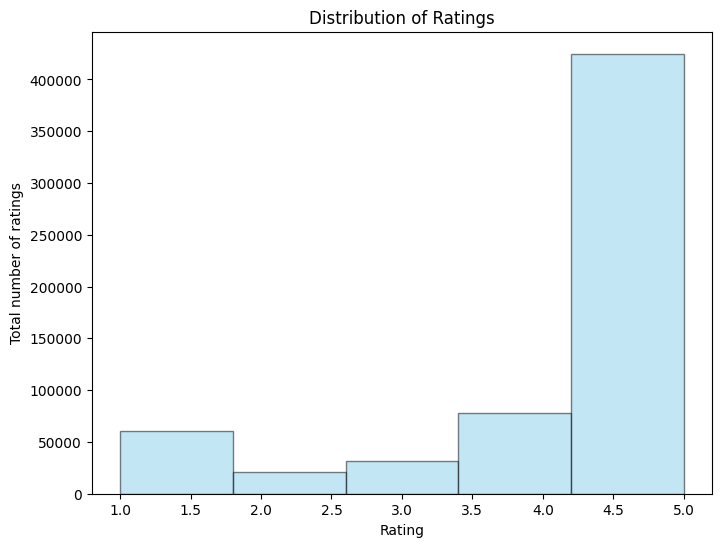

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(cdata['overall'], bins=5, alpha=0.5, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Total number of ratings')
plt.title('Distribution of Ratings')
plt.grid(False)
plt.show()

In [63]:
review_counts = cdata.groupby('reviewerID')['overall'].count().sort_values(ascending=False)
review_counts.describe()

count    514945.000000
mean          1.195753
std           1.089122
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         208.000000
Name: overall, dtype: float64

In [65]:
sum(review_counts>=5)

1856

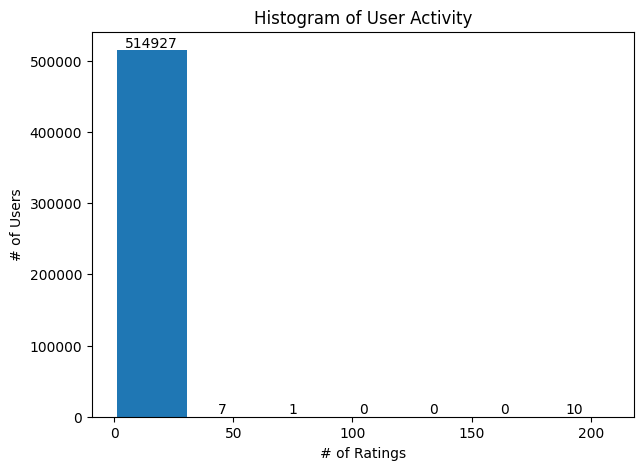

In [66]:
plt.figure(figsize=(7,5))
_, _, bars = plt.hist(review_counts, bins=7)
plt.bar_label(bars)
plt.title('Histogram of User Activity')
plt.xlabel('# of Ratings')
plt.ylabel('# of Users')
plt.show()

In [67]:
average_ratings = cdata.groupby(["title"])["overall"].mean()
average_ratings.nlargest(20)

title
 316407400 Frigidaire Range Glide                                                                                                                                5.0
 3348552 Whirlpool Washer Hose, Pump To Drain                                                                                                                    5.0
 3957749 DRYER KNOB WHIRLPOOL ROPER USED PART fc                                                                                                                 5.0
 53709-28 Maytag Refrigerator Hinge Upper Dr                                                                                                                     5.0
 8544935 WASHER CONTROL KNOB WHIRLPOOL USED PART fc                                                                                                              5.0
 Air King AD1216 Advantage Ductless Under Cabinet Range Hood with 2-Speed Blower, 21-Inch Wide, Black Finish                                                     5.0
 Air

In [68]:
cdata

,reviewerID,asin,overall,unixReviewTime,title,brand
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
1,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
2,A3TIWHNJXMSIU7,B00002N7IL,5.0,1522022400,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
3,A3TIWHNJXMSIU7,B00002N7IL,5.0,1522022400,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
4,AVP16JFIT6LPL,B00002N7IL,5.0,1521504000,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
...,...,...,...,...,...,...
615742,A24A9P4F2SLTK5,B01HJH2PY0,5.0,1502323200,Bosch 00683958 Panel-Facia,Bosch
615743,A2JCB4KHBWEELW,B01HJHHEA0,2.0,1533081600,Frigidaire 316543810 Knob,Frigidaire
615744,A1LDYYVTLPP2Z5,B01HJHHEA0,5.0,1523577600,Frigidaire 316543810 Knob,Frigidaire
615745,AP1M5O06IOYZ7,B01HJH92JQ,1.0,1521763200,Bosch 00175338 Switch,Bosch


In [69]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cdata['reviewerID'] = label_encoder.fit_transform(cdata['reviewerID'])
cdata['asin'] = label_encoder.fit_transform(cdata['asin'])

cdata

,reviewerID,asin,overall,unixReviewTime,title,brand
0,379227,6,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
1,379227,6,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
2,383126,6,5.0,1522022400,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
3,383126,6,5.0,1522022400,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
4,498498,6,5.0,1521504000,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
...,...,...,...,...,...,...
615742,151915,30231,5.0,1502323200,Bosch 00683958 Panel-Facia,Bosch
615743,209079,30236,2.0,1533081600,Frigidaire 316543810 Knob,Frigidaire
615744,80798,30236,5.0,1523577600,Frigidaire 316543810 Knob,Frigidaire
615745,473194,30235,1.0,1521763200,Bosch 00175338 Switch,Bosch


In [70]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [72]:
def df_2_tensor(df, device):
    user_num = np.asarray(df['reviewerID'])
    item_num = np.asarray(df['asin'])
    rating = np.asarray(df['overall'])
    return torch.from_numpy(user_num).to(device), torch.from_numpy(item_num).to(device), torch.from_numpy(rating).to(device)

In [73]:
from sklearn.model_selection import train_test_split

ratings_trainval, ratings_test = train_test_split(cdata, test_size=0.1, random_state=42)
ratings_train, ratings_val = train_test_split(ratings_trainval, test_size=0.1, random_state=42)

In [76]:
train_user_num, train_item_num, train_rating = df_2_tensor(ratings_train,device)

In [77]:
val_user_num, val_item_num, val_rating = df_2_tensor(ratings_val,device)
test_user_num, test_item_num, test_rating = df_2_tensor(ratings_test,device)

In [78]:
def tensor_2_dataset(user,item,rating):
    # your code here
    # Hint: check the zip function
    return list(zip(user,item,rating))

def make_dataloader(dataset,bs,shuffle):
    # your code here
    return torch.utils.data.DataLoader(dataset,batch_size=bs,shuffle=shuffle)

In [79]:
train_dataset = tensor_2_dataset(train_user_num,train_item_num, train_rating)
val_dataset = tensor_2_dataset(val_user_num,val_item_num,val_rating)
test_dataset = tensor_2_dataset(test_user_num, test_item_num, test_rating)

In [80]:
train_dataloader = make_dataloader(train_dataset,1024,True)
val_dataloader = make_dataloader(val_dataset,1024, False)
test_dataloader = make_dataloader(test_dataset,1024,False)

In [81]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [82]:
class ScaledEmbedding(nn.Embedding):
    """
    Embedding layer that initialises its values
    to using a normal variable scaled by the inverse
    of the embedding dimension.
    """
    def reset_parameters(self):
        """
        Initialize parameters.
        """

        self.weight.data.normal_(0, 1.0 / self.embedding_dim)
        if self.padding_idx is not None:
            self.weight.data[self.padding_idx].fill_(0.0)


class ZeroEmbedding(nn.Embedding):
    """
    Used for biases.
    """

    def reset_parameters(self):
        """
        Initialize parameters.
        """

        self.weight.data.zero_()
        if self.padding_idx is not None:
            self.weight.data[self.padding_idx].fill_(0.0)

In [83]:
class DotModel(nn.Module):

    def __init__(self,
                 num_users,
                 num_items,
                 embedding_dim=32):

        super(DotModel, self).__init__()

        self.embedding_dim = embedding_dim

        # TODO: generate user and item embeddigns using ScaledEmbedding
        # your code
        self.user_embeddings = ScaledEmbedding(num_users, embedding_dim)
        self.item_embeddings = ScaledEmbedding(num_items, embedding_dim)

        # TODO: generate bias embeddigns using ZeroEmbedding
        # your code
        self.user_biases = ZeroEmbedding(num_users, 1)
        self.item_biases = ZeroEmbedding(num_items, 1)


    def forward(self, user_ids, item_ids):
        #
        # your code
        #
        user_embedding = self.user_embeddings(user_ids)
        item_embedding = self.item_embeddings(item_ids)

        user_bias = self.user_biases(user_ids).squeeze()
        item_bias = self.item_biases(item_ids).squeeze()

        dot = torch.mul(user_embedding, item_embedding).sum(1)
        res = dot + user_bias + item_bias

        return res

In [85]:
total_user_id = len(cdata['reviewerID'].unique())
total_item_id = len(cdata['asin'].unique())
net = DotModel(total_user_id,total_item_id).to(device)

In [86]:
net

DotModel(
  (user_embeddings): ScaledEmbedding(514945, 32)
  (item_embeddings): ScaledEmbedding(30238, 32)
  (user_biases): ZeroEmbedding(514945, 1)
  (item_biases): ZeroEmbedding(30238, 1)
)

In [87]:
batch_user, batch_item, batch_rating = next(iter(train_dataloader))
batch_user, batch_item, batch_rating = batch_user.to(device), batch_item.to(device), batch_rating.to(device)

In [88]:
predictions = net(batch_user, batch_item)
predictions.shape

torch.Size([1024])

In [89]:
def regression_loss(predicted_ratings, observed_ratings):
    return ((observed_ratings - predicted_ratings) ** 2).mean()

In [90]:
loss=regression_loss(predictions,batch_rating)

In [91]:
loss

tensor(20.3806, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)

In [92]:
class FactorizationModel(object):

    def __init__(self, embedding_dim=32, n_iter=10, l2=0.0,
                 learning_rate=1e-2, device=device, net=None, num_users=None,
                 num_items=None,random_state=None):

        self._embedding_dim = embedding_dim
        self._n_iter = n_iter
        self._learning_rate = learning_rate
        self._l2 = l2
        self._device = device
        self._num_users = num_users
        self._num_items = num_items
        self._net = net
        self._optimizer = None
        self._loss_func = None
        self._random_state = random_state or np.random.RandomState()


    def _initialize(self):
        if self._net is None:
            self._net = DotModel(self._num_users, self._num_items, self._embedding_dim).to(self._device)

        self._optimizer = optim.Adam(
                self._net.parameters(),
                lr=self._learning_rate,
                weight_decay=self._l2
            )

        self._loss_func = regression_loss

    @property
    def _initialized(self):
        return self._optimizer is not None


    def fit(self, dataloader, val_dataloader, verbose=True):
        if not self._initialized:
            self._initialize()

        valid_loss_min = np.Inf # track change in validation loss
        train_losses, valid_losses, valid_maes =[], [], []

        for epoch_num in range(self._n_iter):
            tot_train_loss = 0.0
            ###################
            # train the model #
            ###################
            #TODO: trainining loop:
            # your code
            self._net.train()
            for batch_user, batch_item, batch_rating in dataloader:

                bath_user=batch_user.to(device)
                batch_item=batch_item.to(device)
                batch_rating=batch_rating.to(device)

                #1. Compute the output
                predictions = self._net(batch_user,batch_item)
                #2. Compute the loss
                #loss = self._loss_func(predictions,batch_rating)
                loss = self._loss_func(predictions,batch_rating)
                # 3. Zero out the gradient
                self._optimizer.zero_grad()
                # 4. Backward pass, compute the new gradients
                loss.backward()
                # 5. Update the weights
                self._optimizer.step()

                tot_train_loss += loss.item()


            train_loss = tot_train_loss /len(dataloader)
            # Go to the validation loop
            valid_loss, valid_mae = self.test(val_dataloader)
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)
            valid_maes.append(valid_mae)

            if verbose:
                print('Epoch {}: loss_train {}, loss_val {}'.format(epoch_num, train_loss,valid_loss))

            if np.isnan(train_loss) or train_loss == 0.0:
                raise ValueError('Degenerate train loss: {}'.format(train_loss))

            #TODO: Saving model if validation loss has decreased
            if valid_loss <= valid_loss_min:
              print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
              torch.save(self._net.state_dict(), 'model_cf.pt')
              valid_loss_min = valid_loss

        return train_losses, valid_losses, valid_maes


    ######################
    # validate/Test the model #
    ######################
    def test(self,dataloader, verbose = False):
        self._net.eval()
        L1loss = torch.nn.L1Loss()
        tot_test_loss = 0.0
        tot_test_mae = 0.0

        # TODO: validation/testing loop
        # your code here (mae = mean absolute error)
        with torch.no_grad():
          for batch_user, batch_item, batch_rating in dataloader:
            #1. compute the output
            predictions = self._net(batch_user,batch_item)
            #2. Compute the loss
            loss = self._loss_func(predictions,batch_rating)

            tot_test_loss += loss.item()
            tot_test_mae += L1loss(predictions,batch_rating.type(torch.FloatTensor).to(device))


        test_loss = tot_test_loss / len(dataloader)
        test_mae = tot_test_mae / len(dataloader)
        if verbose:
            print(f"RMSE: {np.sqrt(test_loss)}, MAE: {test_mae}")
        return test_loss, test_mae

In [93]:
model = FactorizationModel(embedding_dim=50,  # latent dimensionality
                                   n_iter=40,  # number of epochs of training
                                   learning_rate=5e-4,
                                   l2=1e-8,  # strength of L2 regularization
                                   num_users=total_user_id,
                                   num_items=total_item_id)

In [94]:
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)

Epoch 0: loss_train 19.441335076095736, loss_val 18.909598898690806
Validation loss decreased (inf --> 18.909599).  Saving model ...
Epoch 1: loss_train 18.19050394354557, loss_val 17.870813247031368
Validation loss decreased (18.909599 --> 17.870813).  Saving model ...
Epoch 2: loss_train 16.337476185290342, loss_val 16.796395364451474
Validation loss decreased (17.870813 --> 16.796395).  Saving model ...
Epoch 3: loss_train 13.655808743683316, loss_val 15.799122681817355
Validation loss decreased (16.796395 --> 15.799123).  Saving model ...
Epoch 4: loss_train 10.644144577287074, loss_val 14.980439924146118
Validation loss decreased (15.799123 --> 14.980440).  Saving model ...
Epoch 5: loss_train 7.910205895699987, loss_val 14.35904840010429
Validation loss decreased (14.980440 --> 14.359048).  Saving model ...
Epoch 6: loss_train 5.774612277548239, loss_val 13.907109759460392
Validation loss decreased (14.359048 --> 13.907110).  Saving model ...
Epoch 7: loss_train 4.237804098990191

In [95]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

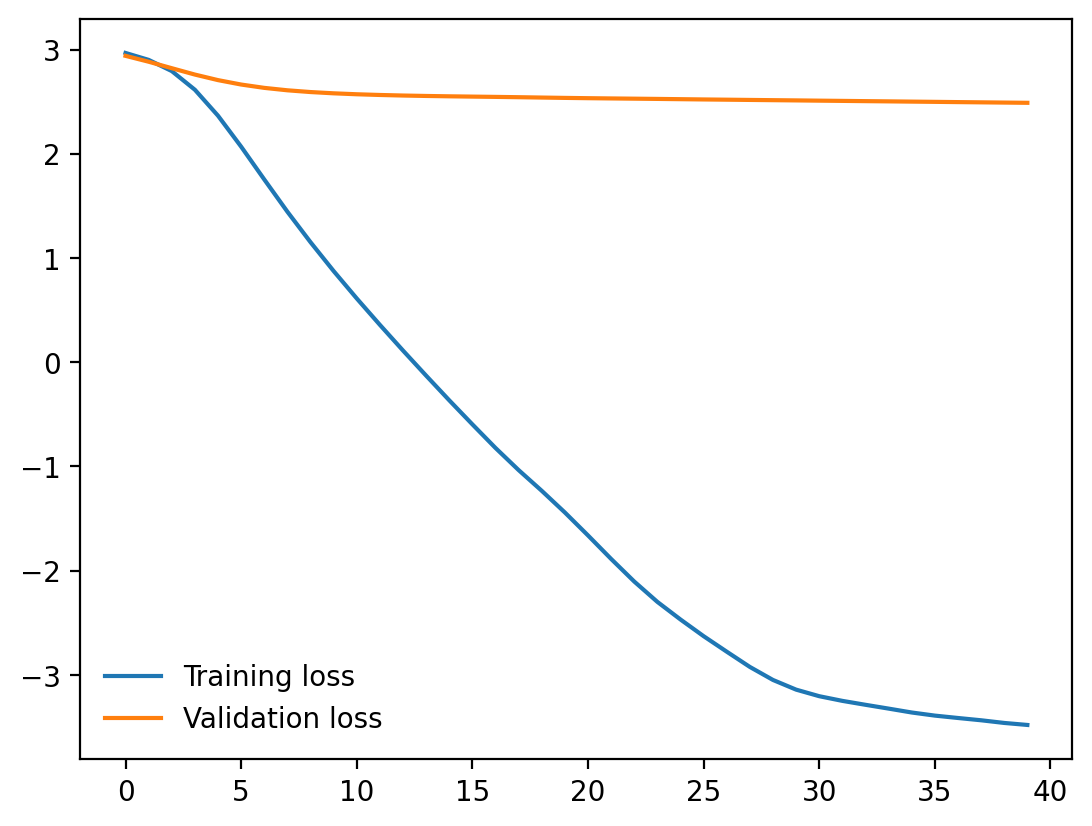

In [96]:
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)

In [97]:
model._net.load_state_dict(torch.load('model_cf.pt'))

<All keys matched successfully>

In [98]:
test_loss, test_mae = model.test(test_dataloader,True)

RMSE: 3.4677279200374267, MAE: 3.118574380874634


In [99]:
model_tuning = FactorizationModel(embedding_dim=128, # embedding_dim 50 --> 128
                  n_iter=20,
                  learning_rate=5e-4,
                  l2=5e-8,  # l2-penalty 1e-8 --> 5e-8
                  num_users=total_user_id,
                  num_items=total_item_id)
train_losses,test_losses, test_maes = model_tuning.fit(train_dataloader,val_dataloader)

Epoch 0: loss_train 19.422787782445255, loss_val 18.865598928435173
Validation loss decreased (inf --> 18.865599).  Saving model ...
Epoch 1: loss_train 17.676442463711027, loss_val 17.58390251823353
Validation loss decreased (18.865599 --> 17.583903).  Saving model ...
Epoch 2: loss_train 13.731932254322949, loss_val 16.358149956688923
Validation loss decreased (17.583903 --> 16.358150).  Saving model ...
Epoch 3: loss_train 8.854000785118517, loss_val 15.556306197748336
Validation loss decreased (16.358150 --> 15.556306).  Saving model ...
Epoch 4: loss_train 5.224670614250267, loss_val 15.11846568569496
Validation loss decreased (15.556306 --> 15.118466).  Saving model ...
Epoch 5: loss_train 3.1815156894450998, loss_val 14.885831472882325
Validation loss decreased (15.118466 --> 14.885831).  Saving model ...
Epoch 6: loss_train 2.041056824622836, loss_val 14.759196571621072
Validation loss decreased (14.885831 --> 14.759197).  Saving model ...
Epoch 7: loss_train 1.3663388347451682

In [101]:
model_tuning._net.load_state_dict(torch.load('model_cf.pt'))
test_loss, test_mae = model_tuning.test(test_dataloader,verbose=True)

RMSE: 3.755466717057721, MAE: 3.413041114807129


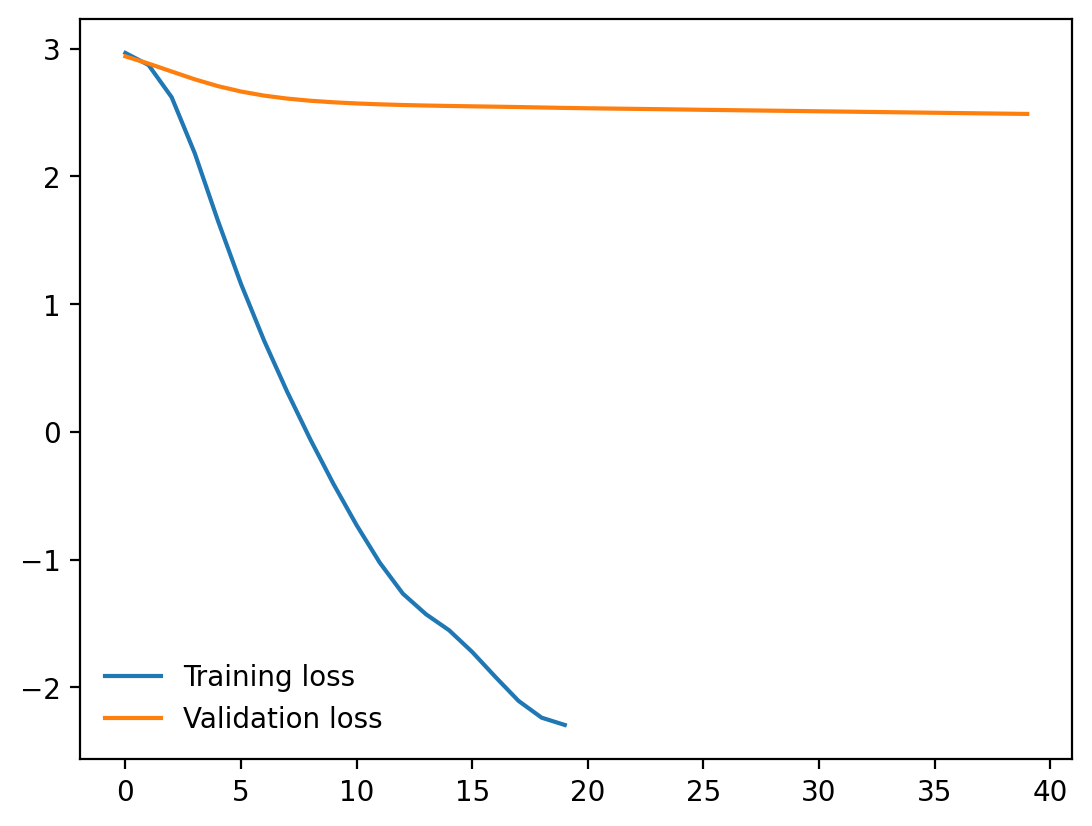

In [102]:
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)